[(404, 13), (404,), (102, 13), (102,)]


  3%|▎         | 342/10000 [00:01<00:35, 272.01it/s]


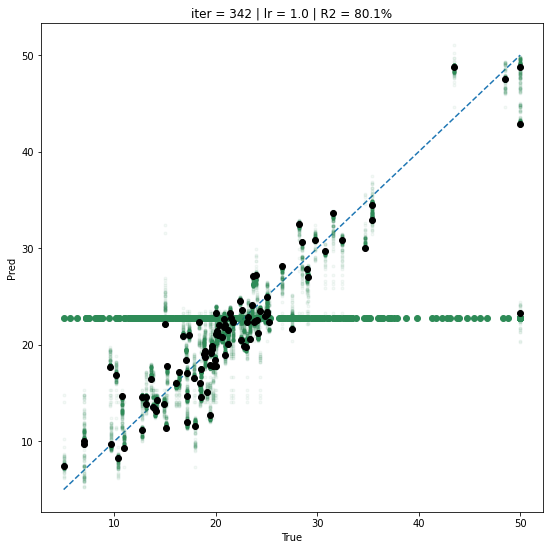

 38%|███▊      | 3759/10000 [00:11<00:19, 318.43it/s]


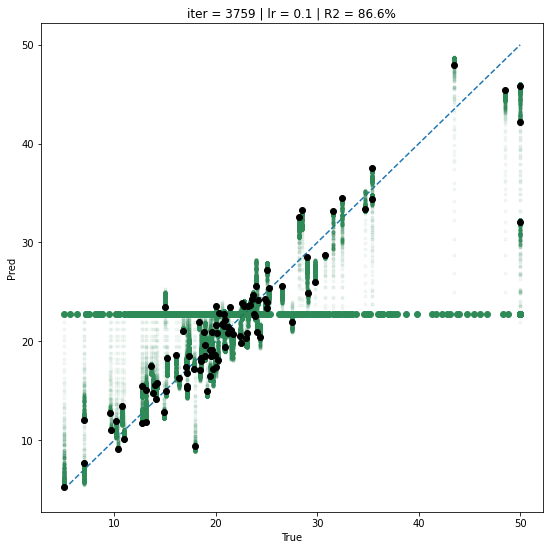

100%|█████████▉| 9999/10000 [00:32<00:00, 312.34it/s]


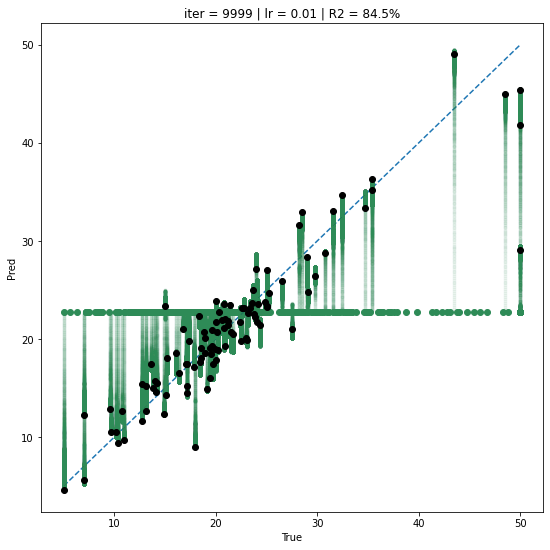

In [11]:
import numpy as np
import matplotlib.pyplot as graph
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from tqdm import trange


x, y = load_boston(return_X_y=True)  # type: np.ndarray, np.ndarray
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print([a.shape for a in (x, y, x_test, y_test)])

# Hyperparameters
learning_rates = [1.0, 0.1, 0.01]
n_iter = 10_000

#######################################################################################################################
# The algorithm
#######################################################################################################################
for learning_rate in learning_rates:
    b = y.mean()
    r = y - b
    r_test = y_test - b

    y_current_pred = np.full_like(y, b)
    y_current_pred_test = np.full_like(y_test, b)

    graph.figure(figsize=(9, 9))
    graph.plot(y, np.full_like(y, b), 'o', color='seagreen')
    graph.plot([y.min(), y.max()], [y.min(), y.max()], '--',)
    graph.ylabel('Pred')
    graph.xlabel('True')

    models = []
    for nth in trange(n_iter):
        model_i = DecisionTreeRegressor(max_depth=2, random_state=42)
        model_i.fit(x, r)
        models.append(model_i)

        # Update for next iteration
        r_hat = learning_rate * model_i.predict(x)
        r_hat_test = learning_rate * model_i.predict(x_test)

        r = r - r_hat
        r_test = r_test - r_hat_test

        # Performance tracking
        y_current_pred += r_hat
        y_current_pred_test += r_hat_test

        r2_train = r2_score(y, y_current_pred)
        r2_val = r2_score(y_test, y_current_pred_test)
        # print(f'R2 train: {r2_train:.1%} | R2 test: {r2_val:.1%}')  # Produces loads of output

        is_last_iter = (nth == (n_iter - 1)) or np.isclose(r2_train, 1.0)
        graph.plot(
            y_test, y_current_pred_test,
            'o' if is_last_iter else '.',
            color='black' if is_last_iter else 'seagreen',
            alpha=1.0 if is_last_iter else 0.05
        )

        if is_last_iter:
            break

    graph.title(f'iter = {nth} | lr = {learning_rate} | R2 = {r2_val:.1%}')
    graph.show()
